## Optimal Allocation of Humanitarian Aid Funds


### Objective:
To assist an International Humanitarian NGO in strategically and effectively allocating a fund of $10 million.

### Problem:
The challenge lies in identifying countries most in need of aid. The key difficulty stems from varying socio-economic and health conditions across nations.

### Data Scientist Role:
- Conduct classification analysis on socio-economic and health indicators to assess the development status of countries.
- Provide data-driven recommendations to prioritize countries needing urgent aid, aiding the NGO's CEO in decision-making.
- Aim to maximize the impact of NGO resources in line with its mission for effective humanitarian assistance.

### Dataset Analysis

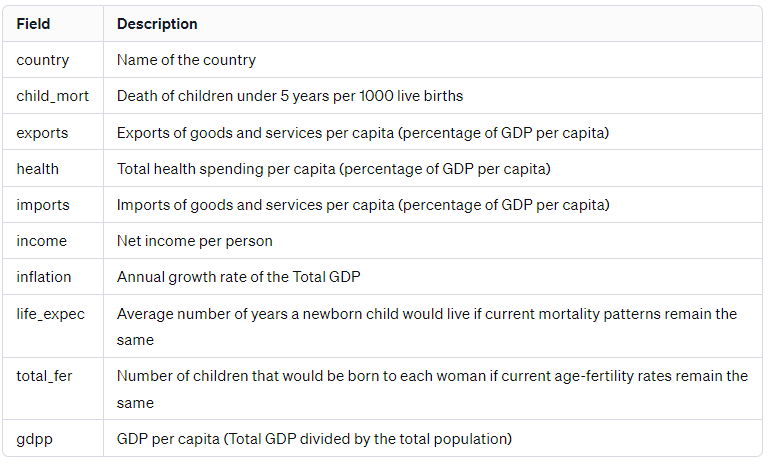

- The dataset contains 167 entries and 10 columns.
- The data types are appropriate for each column, with 7 columns being float, 2 integer, and 1 object (the country name).
- Importantly, there are no missing values in any of the columns, which is great as it means we can proceed without needing to handle missing data.

### Data Loading and Initial Examination

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')


# Load the data
# Data can be downloaded from : https://www.kaggle.com/datasets/vipulgohel/clustering-pca-assignment
file_path_country_data = '/content/Country-data.csv'
country_data = pd.read_csv(file_path_country_data)

In [2]:
country_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### Exploratory Data Analysis (EDA)

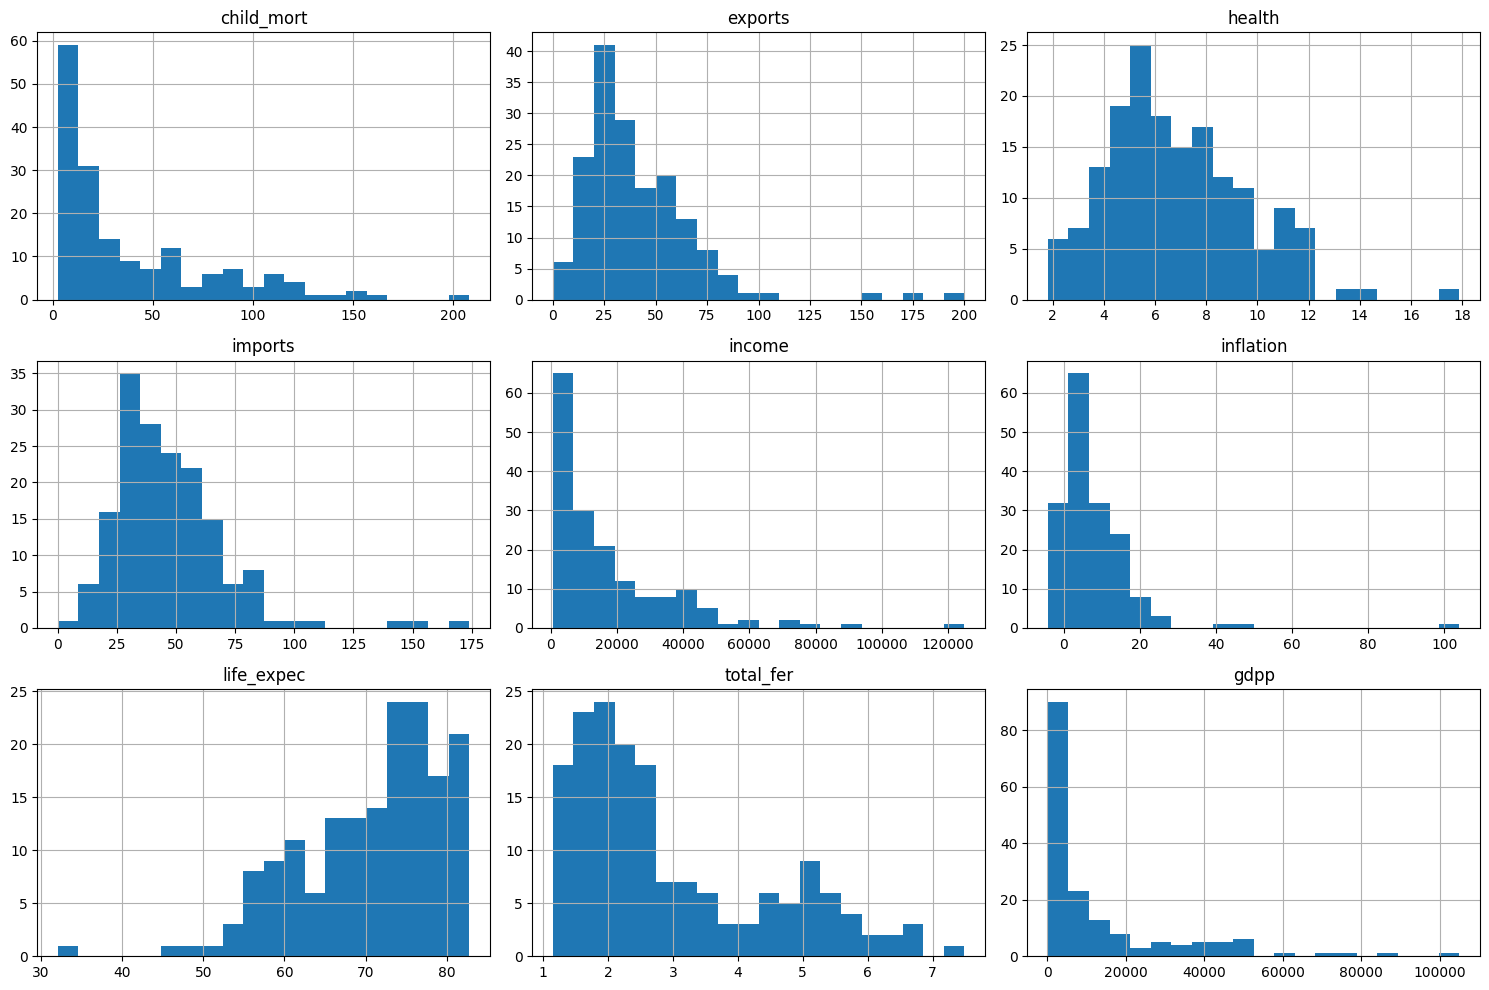

In [3]:
# Histograms for each numerical column
country_data.hist(bins=20, figsize=(15, 10), layout=(3, 3))
plt.tight_layout()
plt.show()

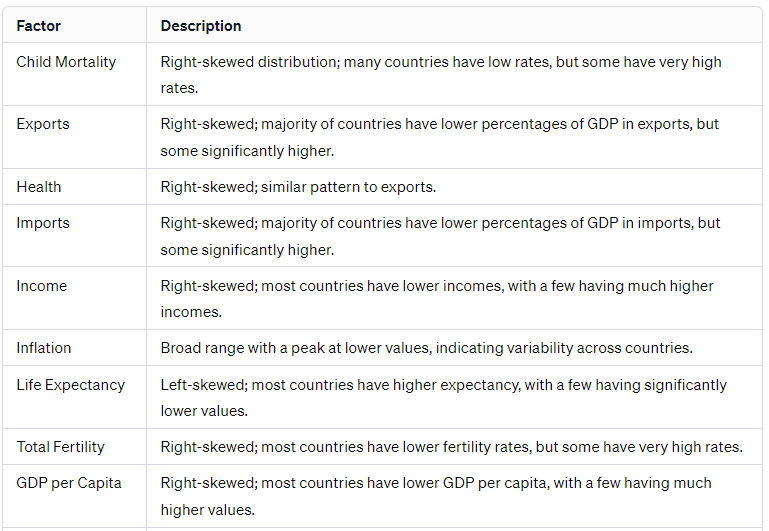

### Key Observations:
- There's significant variability in each factor, indicating diverse levels of development and health across countries.
- Right-skewness in many factors suggests a concentration of countries with lower values and a few outliers with very high values.

### Next Step: Clustering
- We can now proceed to cluster the countries based on these factors to identify which ones are in most need of aid.
- The clustering will help categorize countries into distinct groups based on their development and health indicators.

### Data Scaling for Clustering

In [4]:
# Scaling the data (excluding 'country' column)
data_for_clustering = country_data.drop('country', axis=1)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_for_clustering)

### Elbow Method for Optimal Number of Clusters (K-means)

- K-means requires us to specify the number of clusters (k) in advance, and it finds the best centroids by minimizing the variance within each cluster.
- Since we don't know the optimal number of clusters beforehand, we can use the Elbow Method to determine a good value for k.
- The Elbow Method involves running K-means clustering on the dataset for a range of values of k (say, 1 to 10), and then calculating the sum of squared distances from each point to its assigned center.
- When these overall distances no longer decrease significantly with each iteration, it indicates that the addition of more clusters does not explain much more of the variance in the data.

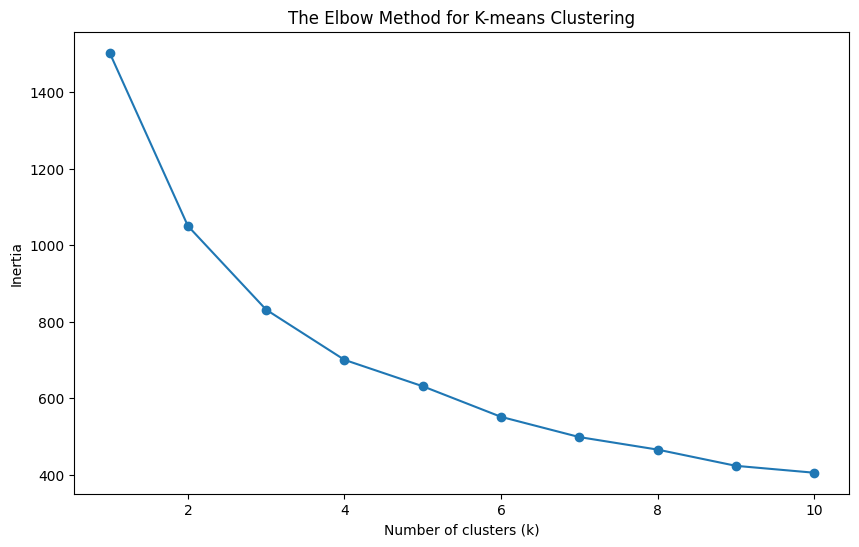

In [5]:
# Finding the optimal number of clusters using the Elbow Method for K-means
inertia_kmeans = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia_kmeans.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia_kmeans, 'o-')
plt.title('The Elbow Method for K-means Clustering')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

The Elbow Method plot for K-means clustering displays the inertia (sum of squared distances to the nearest cluster center) for different numbers of clusters (k).

### Observations:
- The plot does not show a very distinct "elbow", which is the point after which the inertia decreases at a slower rate. This is common in real-world data where clear-cut clusters may not be present.
- However, there seems to be a slight bend around k=3 or k=4.

### Next Steps:
- Given the ambiguity in the Elbow plot, we can choose k=3 for our initial clustering. We can then analyze the characteristics of each cluster to determine the countries that are most in need of aid.

### Applying K-means Clustering

In [6]:
# Applying K-means clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans_clusters = kmeans.fit_predict(scaled_data)

# Adding cluster labels to the original dataframe
country_data['Cluster'] = kmeans_clusters

In [7]:
country_data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


### K-means Clustering Analysis with k=3
The K-means algorithm has divided the countries into three clusters. Here's a summary of the distribution and characteristics of each cluster:

### Cluster Distribution:
- **Cluster 0:** 47 countries
- **Cluster 1:** 84 countries
- **Cluster 2:** 36 countries

### Cluster Characteristics:

**Cluster 0 (High Need):**
- High child mortality rates.
- Low income and GDP per capita.
- Lower life expectancy.
- High total fertility.
- This cluster likely represents countries with significant socio-economic challenges and high need for aid.

**Cluster 1 (Moderate Need):**
- Moderate child mortality rates.
- Moderate income and GDP per capita.
- Better life expectancy than Cluster 0.
- Lower total fertility rates than Cluster 0.
- Countries in this cluster are better off than those in Cluster 0 but still have development needs.

**Cluster 2 (Low Need):**
- Very low child mortality rates.
- High income and GDP per capita.
- High life expectancy.
- Low total fertility rates.
- This cluster represents the most developed countries with the lowest need for immediate aid.

### Recommendations for Aid Allocation:
- **Focus on Cluster 0:** These countries are most in need of aid. The NGO's resources can be highly impactful here.
- **Selective Support in Cluster 1:** Countries in this cluster may benefit from targeted aid, especially in areas where development gaps exist.
- **Limited to No Aid in Cluster 2:** These countries are relatively well-off and may not be the best candidates for aid allocation under the current criteria.
Would you like to proceed with a detailed analysis of specific countries in Cluster 0 for prioritization, or any other analysis?​

### Analysis of Clusters

In [8]:
# Analyzing the distribution of countries across clusters and mean values of clusters
cluster_distribution_kmeans = country_data['Cluster'].value_counts()
cluster_means_kmeans = country_data.groupby('Cluster').mean()

In [9]:
cluster_means_kmeans

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
Cluster,,,,,,,,,
0,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
1,21.927381,40.243917,6.200952,47.473404,12305.595238,7.600905,72.814286,2.307500,6486.452381
2,5.000000,58.738889,8.807778,51.491667,45672.222222,2.671250,80.127778,1.752778,42494.444444


### Detailed Analysis of Specific Cluster (e.g., Cluster 0)

In [10]:
# Extracting and sorting countries in Cluster 0
cluster_0_countries = country_data[country_data['Cluster'] == 0]
sorted_cluster_0 = cluster_0_countries.sort_values(['child_mort', 'income', 'gdpp'],
                                                   ascending=[False, True, True])

In [11]:
sorted_cluster_0

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster
66,Haiti,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662,0
132,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0
97,Mali,137.0,22.80,4.98,35.1,1870,4.370,59.5,6.55,708,0
113,Nigeria,130.0,25.30,5.07,17.4,5150,104.000,60.5,5.84,2330,0
112,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0


### Detailed Analysis of Countries in Cluster 0 (High Need)
The following is an analysis of countries in Cluster 0, sorted primarily by child mortality rate (highest to lowest), and then by income and GDP per capita (lowest to highest). These countries are characterized by high needs and challenges, making them potential primary targets for aid:

- **Haiti:** Extremely high child mortality rate, very low income and GDP per capita.
- **Sierra Leone:** Very high child mortality, very low income and GDP per capita.
- **Chad:** High child mortality, low income, and low GDP per capita.
- **Central African Republic:** Very high child mortality, the lowest income in the cluster, very low GDP per capita.
- **Mali:** High child mortality, low income, and low GDP per capita.
(And so on for other countries listed...)

### Key Considerations for Aid Allocation:
- **Focus on Child Mortality:** Countries like Haiti, Sierra Leone, and Chad, with the highest child mortality rates, should be considered top priorities.
- **Economic Needs:** Countries with the lowest income and GDP per capita, such as Central African Republic, Niger, and Burundi, indicate severe economic challenges.
- **Potential for Impact:** Countries with relatively higher income but still high child mortality rates (e.g., Angola, Nigeria) might have specific areas where aid can make a significant impact.
- **Geographical and Political Stability:** Consideration of the local political situation, accessibility, and current presence of other aid organizations can also inform the decision.

These insights should guide the NGO in prioritizing countries for aid distribution, focusing on those with the most critical needs in terms of child mortality, economic struggles, and overall development indicators.